# Solar Data EDA Notebook (Benin, Sierra Leone, Togo)

This notebook includes:
- **Imports:** pandas, matplotlib, seaborn, and other required libraries.
- **Data Loading:** Load and explore solar datasets from Benin (Malanville), Sierra Leone (Bo), and Togo (Kara).
- **Timestamp Parsing:** Convert the `Timestamp` column to datetime format for all datasets.
- **Time-Series Visualization:** Compare and visualize GHI, DNI, DHI, and Tamb trends over time across the three locations.
- **Missing Value Checks:** Identify and report any null or missing values in each dataset.
- **Comparative Analysis:** Highlight key differences or similarities in solar patterns between countries.



In [16]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Togo Dataset Summary:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50

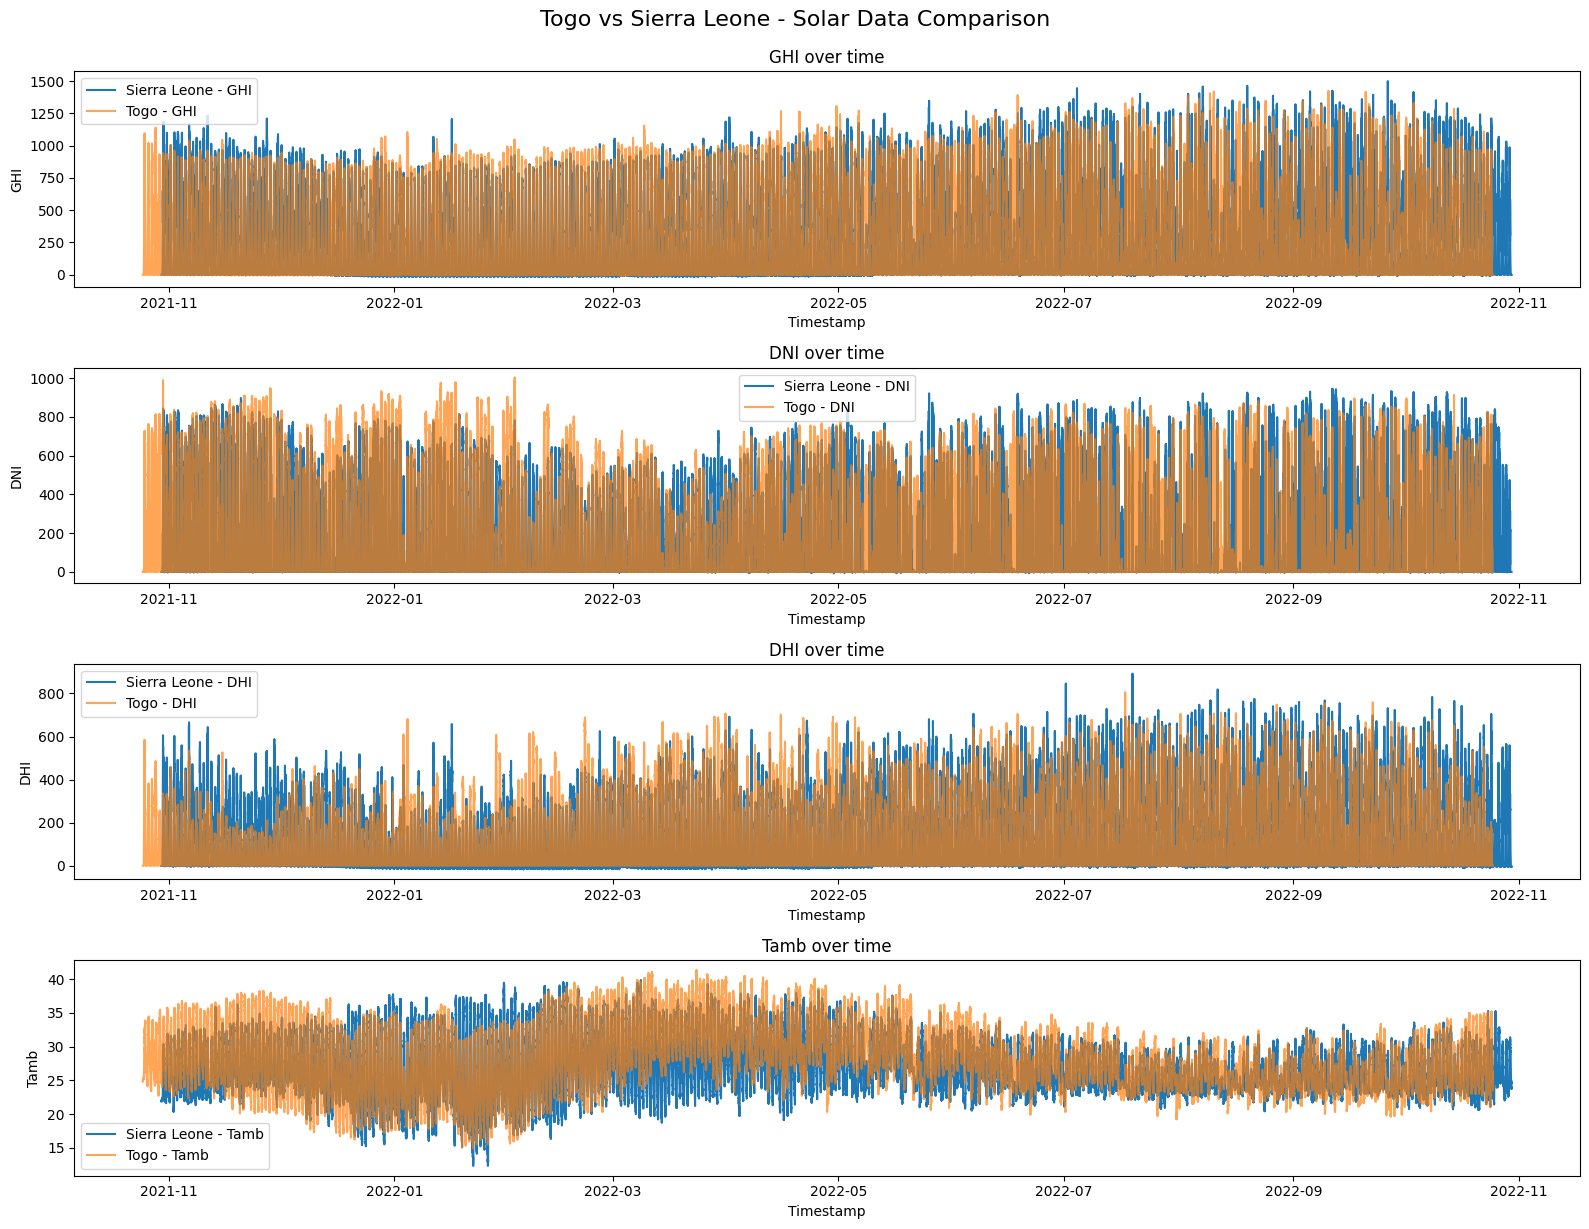

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_togo = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\togo-dapaong_qc.csv")
df_sierra = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\sierraleone-bumbuna.csv")

# Convert Timestamp to datetime
df_togo['Timestamp'] = pd.to_datetime(df_togo['Timestamp'])
df_sierra['Timestamp'] = pd.to_datetime(df_sierra['Timestamp'])

# Display basic info
print("Togo Dataset Summary:")
print(df_togo.describe(), "\n")

print("Sierra Leone Dataset Summary:")
print(df_sierra.describe(), "\n")

# Check for missing values
print("Missing values in Togo:")
print(df_togo.isna().sum(), "\n")

print("Missing values in Sierra Leone:")
print(df_sierra.isna().sum(), "\n")

# Set Timestamp as index for plotting
df_togo.set_index('Timestamp', inplace=True)
df_sierra.set_index('Timestamp', inplace=True)

# Plotting GHI, DNI, DHI, Tamb
features = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(4, 1, i + 1)
    plt.plot(df_sierra.index, df_sierra[feature], label='Sierra Leone - ' + feature)
    plt.plot(df_togo.index, df_togo[feature], label='Togo - ' + feature, alpha=0.7)
    plt.legend()
    plt.title(f'{feature} over time')
    plt.xlabel('Timestamp')
    plt.ylabel(feature)
    plt.tight_layout()

plt.suptitle("Togo vs Sierra Leone - Solar Data Comparison", fontsize=16, y=1.02)
plt.show()


In [41]:
# Parse Timestamp column as datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

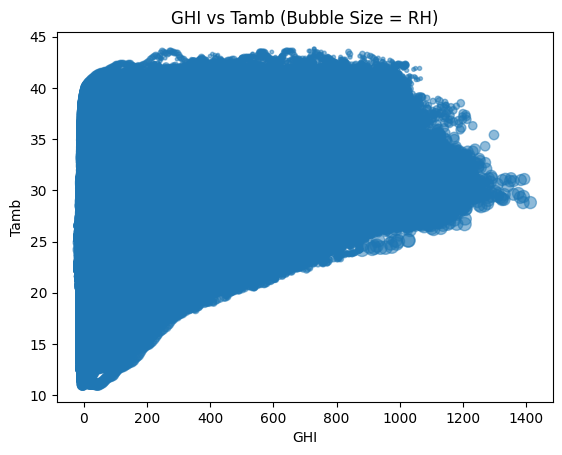

In [42]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI'); plt.ylabel('Tamb'); plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.show()


<Axes: >

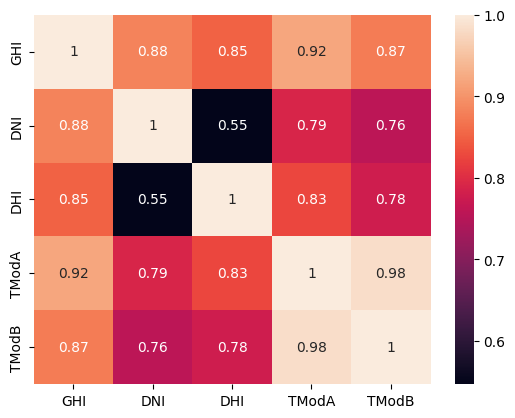

In [43]:
import seaborn as sns

sns.heatmap(df[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True)


In [44]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [ ]:
# Example: flag outliers using z-score (simple version)
from scipy.stats import zscore

df["z_modA"] = zscore(df["ModA"])
df["outlier"] = (df["z_modA"].abs() > 3)  


C:\Users\hp\AppData\Local\Temp\ipykernel_8464\776563150.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\week-0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\week-0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\week-0\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


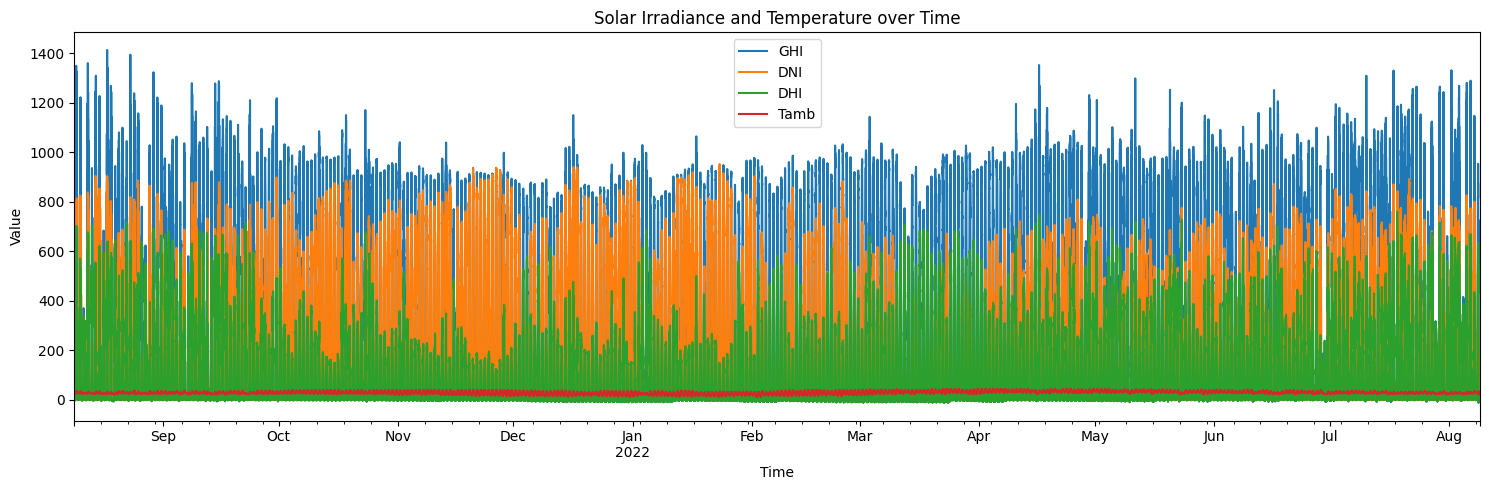

In [46]:
# Plot GHI, DNI, DHI, and Tamb over time
df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 5))
plt.title("Solar Irradiance and Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

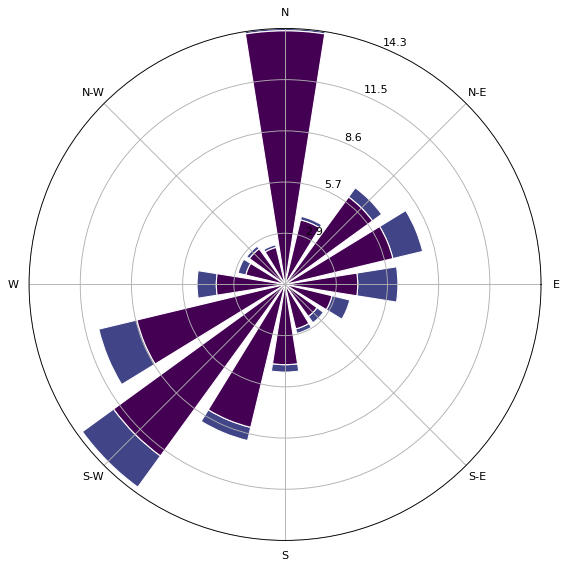

In [47]:
# pip install windrose or plotly-express
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor='white')


In [48]:
import os
print(os.getcwd())



c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\notebooks


In [ ]:
import pandas as pd


df = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville.csv")


print(df.describe())
print(df.isna().sum())


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [50]:
import pandas as pd

df_benin = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville.csv")
df_sierra = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\sierraleone-bumbuna.csv")
df_togo = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\togo-dapaong_qc.csv")


In [51]:
df = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville.csv")


In [52]:
import pandas as pd

df = pd.read_csv(r"c:\Users\hp\OneDrive\Desktop\solar-challenge-week1\data\benin-malanville.csv")
print(df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
